In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import *

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Transported
True     4378
False    4315
Name: count, dtype: int64


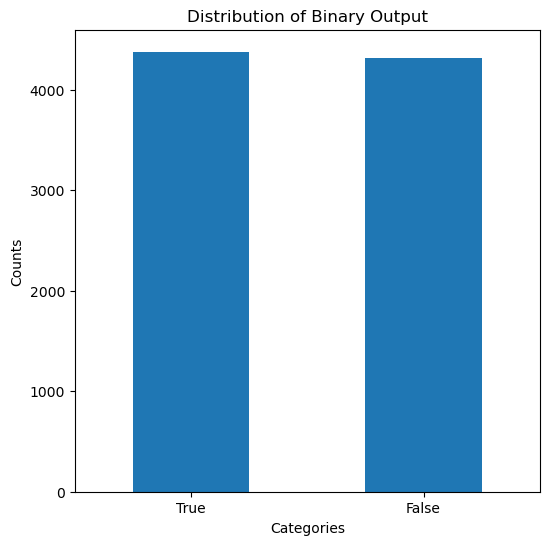

In [3]:
#EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate counts of each category
counts = train_data['Transported'].value_counts()
print(counts)

# Plotting
plt.figure(figsize=(6, 6))
counts.plot(kind='bar')
plt.title('Distribution of Binary Output')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Rotate x-labels if needed
plt.show()

In [4]:
nulls = train_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

HomePlanet 201
CryoSleep 217
Cabin 199
Destination 182
Age 179
VIP 203
RoomService 181
FoodCourt 183
ShoppingMall 208
Spa 183
VRDeck 188
Name 200


In [5]:
X = train_data.drop('Transported', axis=1)
y = train_data['Transported']
# Split the data into training and testing sets with stratification
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=21)

# Creating dataframes from the split data
train_df = pd.concat([X_train, y_train], axis=1)
valid_df = pd.concat([X_valid, y_valid], axis=1)

In [6]:
nulls = train_df.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index,row[0],row[0]/len(train_df))
    else:
        continue

HomePlanet 159 0.02286453839516825
CryoSleep 175 0.025165372447512224
Cabin 160 0.02300834052343975
Destination 140 0.02013229795800978
Age 148 0.021282714984181765
VIP 160 0.02300834052343975
RoomService 139 0.01998849582973828
FoodCourt 149 0.021426517112453265
ShoppingMall 172 0.02473396606269773
Spa 146 0.02099511072763877
VRDeck 150 0.021570319240724764
Name 152 0.02185792349726776


In [7]:
nulls = valid_df.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

HomePlanet 42
CryoSleep 42
Cabin 39
Destination 42
Age 31
VIP 43
RoomService 42
FoodCourt 34
ShoppingMall 36
Spa 37
VRDeck 38
Name 48


In [8]:
nulls = test_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

HomePlanet 87
CryoSleep 93
Cabin 100
Destination 92
Age 91
VIP 93
RoomService 82
FoodCourt 106
ShoppingMall 98
Spa 101
VRDeck 80
Name 94


In [9]:
import feature_engineering as fe
# train_df=fe.feature_expansion(train_df,'Transported')
# valid_df=fe.feature_expansion(valid_df,'Transported')
# test_data=fe.feature_expansion(test_data)
expense_col=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
train_df,valid_df,test_data=fe.engineer_data(expense_col,train_df,test_data,valid_df)
train_df_og=train_df.copy()

In [10]:
train_df.to_csv('training.csv',index=False)
valid_df.to_csv('validation.csv',index=False)
test_data.to_csv('testing.csv',index=False)

In [11]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a crosstab of a categorical feature and the target variable
crosstab = pd.crosstab(train_df['HomePlanet'], train_df['Transported'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print(f'Chi-Square statistic: {chi2}')
print(f'p-value: {p}')


Chi-Square statistic: 268.2181593878133
p-value: 5.716980564864095e-59


In [12]:
# Create a crosstab of a categorical feature and the target variable
crosstab = pd.crosstab(train_df['Group'], train_df['Transported'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print(f'Chi-Square statistic: {chi2}')
print(f'p-value: {p}')

Chi-Square statistic: 5399.405345426091
p-value: 0.061977681976171824


In [13]:
# Create a crosstab of a categorical feature and the target variable
crosstab = pd.crosstab(train_df['deck'], train_df['Transported'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print(f'Chi-Square statistic: {chi2}')
print(f'p-value: {p}')

Chi-Square statistic: 319.47135887931876
p-value: 4.18226893341016e-65


In [14]:
# Create a crosstab of a categorical feature and the target variable
crosstab = pd.crosstab(train_df['Surname'], train_df['Transported'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print(f'Chi-Square statistic: {chi2}')
print(f'p-value: {p}')

Chi-Square statistic: 2300.7672036180097
p-value: 0.0023103244493922525


In [15]:
train_df,valid_df,test_data=fe.fill_missing_values(train_df,test_data,valid_df)
train_df.to_csv('training_filled.csv',index=False)
valid_df.to_csv('validation_filled.csv',index=False)
test_data.to_csv('testing_filled.csv',index=False)
combined_df = pd.concat([train_df, valid_df], ignore_index=True)
sorted_df = combined_df.sort_values(by='PassengerId')
sorted_df.to_csv('train_filled.csv',index=False)

In [16]:
nulls = train_df.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index,row[0],row[0]/len(train_df))
    else:
        continue

Destination 139 0.01998849582973828
Age 148 0.021282714984181765
VIP 43 0.006183491515674432
RoomService 82 0.01179177451826287
FoodCourt 85 0.012223180903077365
ShoppingMall 82 0.01179177451826287
Spa 89 0.01279838941616336
VRDeck 84 0.012079378774805867
Surname 152 0.02185792349726776
deck 160 0.02300834052343975
num 160 0.02300834052343975
side 160 0.02300834052343975
expenses 407 0.05852746620649986


In [17]:
nulls = valid_df.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

Destination 41
Age 31
VIP 11
RoomService 25
FoodCourt 21
ShoppingMall 19
Spa 24
VRDeck 21
Surname 48
deck 39
num 39
side 39
expenses 106


In [18]:
nulls = test_data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    if row[0] > 0:
        print(index, row[0])
    else:
        continue

Destination 92
Age 91
VIP 41
RoomService 55
FoodCourt 65
ShoppingMall 60
Spa 51
VRDeck 43
Surname 94
deck 100
num 100
side 100
expenses 266


Contingency Table:
 HomePlanet  Earth  Europa  Mars
HomePlanet                     
Earth        1591     709   639
Europa        714     363   284
Mars          619     296   227
Chi-Square Test p-value: 0.3182
No significant difference between original and imputed distributions.


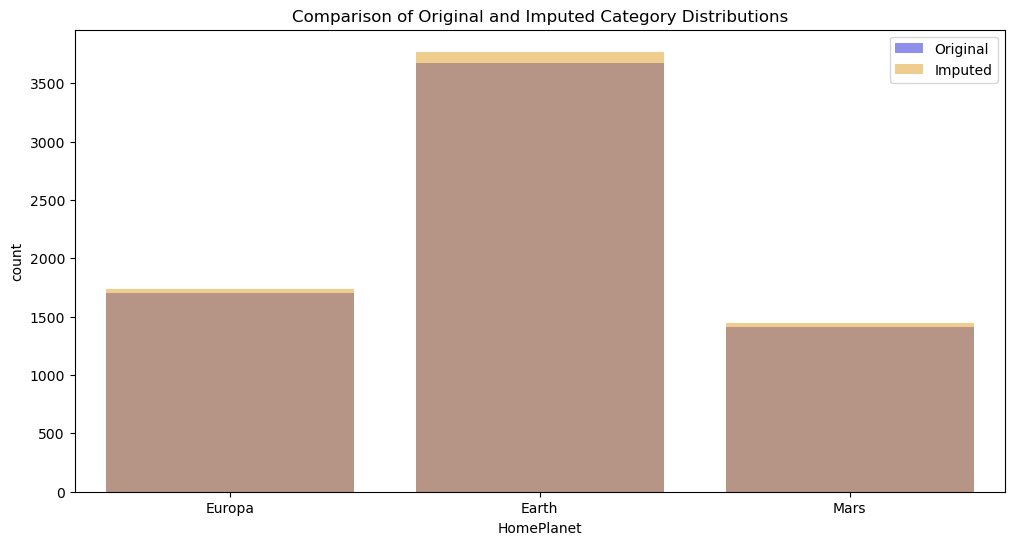

In [19]:
from eda_mod import check_feature_bias,bias_plot
chi2, p, dof, ex=check_feature_bias(train_df_og,train_df,'HomePlanet')
if p < 0.05:
    print("Significant difference between original and imputed distributions, indicating potential bias.")
else:
    print("No significant difference between original and imputed distributions.")
bias_plot(train_df_og,train_df,'HomePlanet')

Contingency Table:
 CryoSleep  False  True 
CryoSleep              
False       2173   1304
True        1283    670
Chi-Square Test p-value: 0.0203
Significant difference between original and imputed distributions, indicating potential bias.


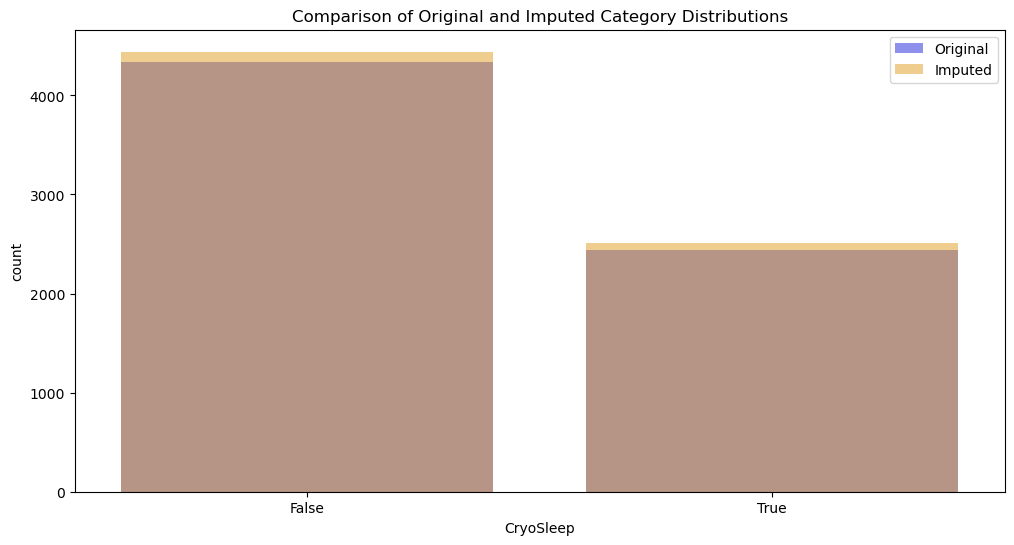

In [20]:
chi2, p, dof, ex=check_feature_bias(train_df_og,train_df,'CryoSleep')
if p < 0.05:
    print("Significant difference between original and imputed distributions, indicating potential bias.")
else:
    print("No significant difference between original and imputed distributions.")
bias_plot(train_df_og,train_df,'CryoSleep')

Contingency Table:
 VIP    False  True 
VIP                
False   5158    134
True     116      5
Chi-Square Test p-value: 0.4182
No significant difference between original and imputed distributions.


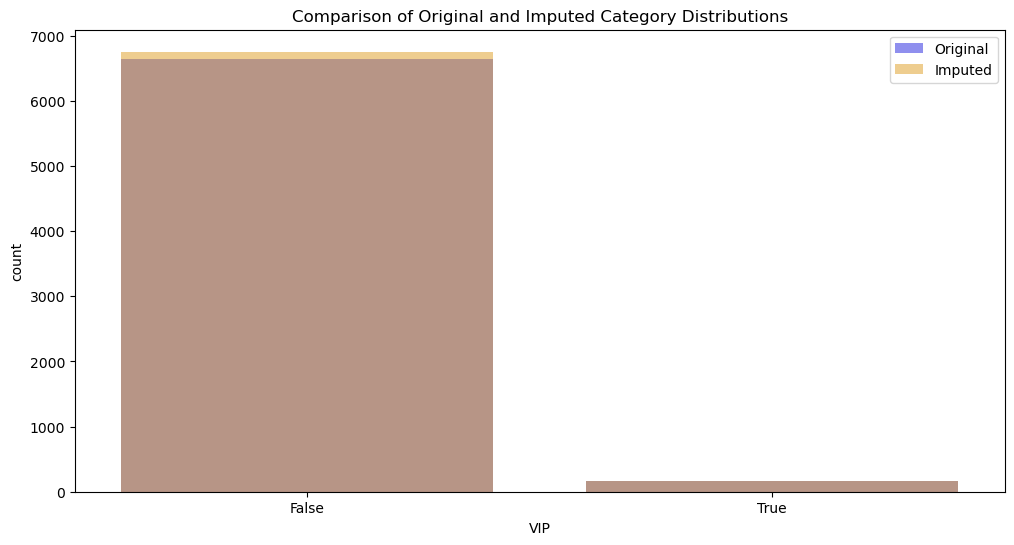

In [21]:
chi2, p, dof, ex=check_feature_bias(train_df_og,train_df,'VIP')
if p < 0.05:
    print("Significant difference between original and imputed distributions, indicating potential bias.")
else:
    print("No significant difference between original and imputed distributions.")
bias_plot(train_df_og,train_df,'VIP')

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
tem_train=pd.get_dummies(train_df.drop(columns=['PassengerId','Transported']), columns=['HomePlanet', 'Destination','Surname','deck','side'])
c_m=tem_train.corr()
filter_criteria_x = [col for col in c_m.columns if 'HomePlanet' in col]
filter_criteria_y = [col for col in c_m.columns if 'Surname' in col]
filtered_correlation_matrix = c_m.loc[filter_criteria_x, filter_criteria_y]

print("\nFiltered Correlation Matrix:")
print(filtered_correlation_matrix)
threshold = 0.5
high_corr_matrix = c_m.abs() > threshold
np.fill_diagonal(high_corr_matrix.values, False)
# Find the pairs of features with high correlation
high_corr_pairs = [(i, j) for i in range(len(high_corr_matrix.columns)) 
                            for j in range(i) 
                            if high_corr_matrix.iloc[i, j]]

# Print the pairs with their correlation values
print("\nFeature Pairs with Correlation Exceeding Threshold:")
for i, j in high_corr_pairs:
    print(f"{c_m.columns[i]} - {c_m.columns[j]}: {c_m.iloc[i, j]}")


Filtered Correlation Matrix:
                   Surname_Acobson  Surname_Acobsond  Surname_Adavisons  \
HomePlanet_Earth          0.022041          0.015583           0.031179   
HomePlanet_Europa        -0.013838         -0.009783          -0.019575   
HomePlanet_Mars          -0.012297         -0.008694          -0.017396   

                   Surname_Adkinson  Surname_Admingried  Surname_Aginge  \
HomePlanet_Earth           0.019087           -0.022612       -0.013053   
HomePlanet_Europa         -0.011983            0.036018        0.020792   
HomePlanet_Mars           -0.010649           -0.010649       -0.006147   

                   Surname_Ailled  Surname_Aillyber  Surname_Aiming  \
HomePlanet_Earth        -0.013053         -0.022612       -0.013053   
HomePlanet_Europa        0.020792          0.036018        0.020792   
HomePlanet_Mars         -0.006147         -0.010649       -0.006147   

                   Surname_Ainatint  ...  Surname_Wooterston  \
HomePlanet_Earth   